<a href="https://colab.research.google.com/github/JPP-J/deep-_learning_project/blob/main/DL_1_Classified_object_imagenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Usage GPU

In [1]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [2]:
import torch

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


# Pretrained models

In [3]:
!pip install timm
import timm

model list (pre-tained)

In [4]:
for i,n in enumerate(timm.list_models('*', pretrained=True)):
  print(i,n)

0 bat_resnext26ts.ch_in1k
1 beit_base_patch16_224.in22k_ft_in22k
2 beit_base_patch16_224.in22k_ft_in22k_in1k
3 beit_base_patch16_384.in22k_ft_in22k_in1k
4 beit_large_patch16_224.in22k_ft_in22k
5 beit_large_patch16_224.in22k_ft_in22k_in1k
6 beit_large_patch16_384.in22k_ft_in22k_in1k
7 beit_large_patch16_512.in22k_ft_in22k_in1k
8 beitv2_base_patch16_224.in1k_ft_in1k
9 beitv2_base_patch16_224.in1k_ft_in22k
10 beitv2_base_patch16_224.in1k_ft_in22k_in1k
11 beitv2_large_patch16_224.in1k_ft_in1k
12 beitv2_large_patch16_224.in1k_ft_in22k
13 beitv2_large_patch16_224.in1k_ft_in22k_in1k
14 botnet26t_256.c1_in1k
15 caformer_b36.sail_in1k
16 caformer_b36.sail_in1k_384
17 caformer_b36.sail_in22k
18 caformer_b36.sail_in22k_ft_in1k
19 caformer_b36.sail_in22k_ft_in1k_384
20 caformer_m36.sail_in1k
21 caformer_m36.sail_in1k_384
22 caformer_m36.sail_in22k
23 caformer_m36.sail_in22k_ft_in1k
24 caformer_m36.sail_in22k_ft_in1k_384
25 caformer_s18.sail_in1k
26 caformer_s18.sail_in1k_384
27 caformer_s18.sail_i

categories imagnet labels list

In [5]:
import timm
import json
import requests

# Load the pretrained model
model = timm.create_model('resnet50d', pretrained=True)

# Load ImageNet class labels (or any other labels depending on your model)
url = 'https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json'
response = requests.get(url)
class_idx = response.json()

# Display the class labels
for idx, (class_id, class_name) in class_idx.items():
    print(f"{idx} Class ID: {class_id}, Class Name: {class_name}")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


0 Class ID: n01440764, Class Name: tench
1 Class ID: n01443537, Class Name: goldfish
2 Class ID: n01484850, Class Name: great_white_shark
3 Class ID: n01491361, Class Name: tiger_shark
4 Class ID: n01494475, Class Name: hammerhead
5 Class ID: n01496331, Class Name: electric_ray
6 Class ID: n01498041, Class Name: stingray
7 Class ID: n01514668, Class Name: cock
8 Class ID: n01514859, Class Name: hen
9 Class ID: n01518878, Class Name: ostrich
10 Class ID: n01530575, Class Name: brambling
11 Class ID: n01531178, Class Name: goldfinch
12 Class ID: n01532829, Class Name: house_finch
13 Class ID: n01534433, Class Name: junco
14 Class ID: n01537544, Class Name: indigo_bunting
15 Class ID: n01558993, Class Name: robin
16 Class ID: n01560419, Class Name: bulbul
17 Class ID: n01580077, Class Name: jay
18 Class ID: n01582220, Class Name: magpie
19 Class ID: n01592084, Class Name: chickadee
20 Class ID: n01601694, Class Name: water_ouzel
21 Class ID: n01608432, Class Name: kite
22 Class ID: n01614

---

## Classified image

Get pic fucntion

In [6]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np


def get_pic(url):

  # URL of the image
  url = url

  try:
      # Fetch the image content
      response = requests.get(url, stream=True)
      response.raise_for_status()  # Raise an exception for HTTP errors

      # Open the image
      image = Image.open(BytesIO(response.content)).convert("RGB")

      # Display the image
      plt.imshow(image)
      plt.axis('off')  # axis for a clean image display
      plt.show()

      print(f"image size(w, h): {image.size}")

  except requests.exceptions.RequestException as req_err:
      print("Request error:", req_err)
  except Image.UnidentifiedImageError as img_err:
      print("Image error:", img_err)
  except Exception as e:
      print("An error occurred:", e)
  return image


Used resnet50d model

transfrom details

In [7]:
from timm.data import resolve_data_config
from timm.data.transforms_factory import create_transform

def transform_details(model='resnet50d'):
  # Load the pretrained model
  model = timm.create_model(model, pretrained=True)
  transform = create_transform(**resolve_data_config(model.pretrained_cfg, model=model))
  print(transform)

Inference pic

In [8]:
transform_details(model='resnet50d')

Compose(
    Resize(size=256, interpolation=bicubic, max_size=None, antialias=True)
    CenterCrop(size=(224, 224))
    MaybeToTensor()
    Normalize(mean=tensor([0.4850, 0.4560, 0.4060]), std=tensor([0.2290, 0.2240, 0.2250]))
)


In [9]:
import torch
import timm
import requests
import torchvision.transforms as T
from timm.data import resolve_data_config
from timm.data.transforms_factory import create_transform

def inference_pic(image, model='resnet50d'):
  # Load the pretrained model
  model = timm.create_model(model, pretrained=True)
  model.eval()  # Set the model to evaluation mode

  # Load ImageNet class labels
  url = 'https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json'
  response = requests.get(url)
  class_idx = response.json()

  # Transform and input image tensor
  transform = create_transform(**resolve_data_config(model.pretrained_cfg, model=model))
  input_tensor = transform(image)
  print(input_tensor.shape)  # Should be [3, 224, 224] for most pretrained models

  # transform with torchvision
  tr = T.ToPILImage()

  # re-compo in torchvision with model causing normalize and standardize
  # change it along with transformer used model
  tr = T.Compose([
      T.Resize(size=256),
      T.CenterCrop(size=(224, 224)),
  ])

  # Apply the transformation
  img = tr(image)

  # show after transformation
  plt.imshow(img)
  plt.axis('off')
  plt.show()

  # Perform inference
  out = model(input_tensor.unsqueeze(0))

  # Get top n predictions (indices and values)
  topk_values, topk_indices = out.topk(5, dim=1)

  # Map indices to class labels
  topk_labels = [class_idx[str(idx.item())][1] for idx in topk_indices[0]]

  # Print the results
  for i, (value, idx, label) in enumerate(zip(topk_values[0], topk_indices[0], topk_labels)):
      print(f"Rank {i+1}:")
      print(f"  Class Index: {idx.item()}")
      print(f"  Class Label: {label}")
      print(f"  Confidence: {value.item():.4f}")


## Example Usage

Example1:

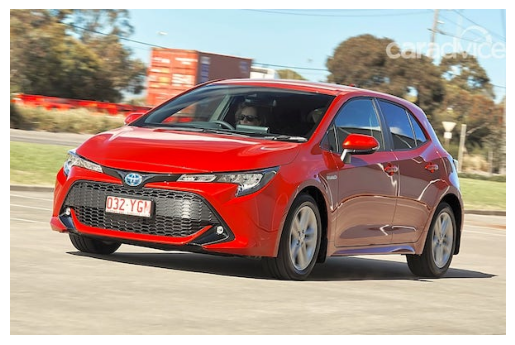

image size(w, h): (600, 394)


In [14]:
url1 = "https://i0.wp.com/bestsellingcarsblog.com/wp-content/uploads/2019/08/Toyota-Corolla-Australia-July-2019.-Picture-caradvice.com_.au_.jpg?fit=600%2C394&ssl=1"
image1 = get_pic(url1)

torch.Size([3, 224, 224])


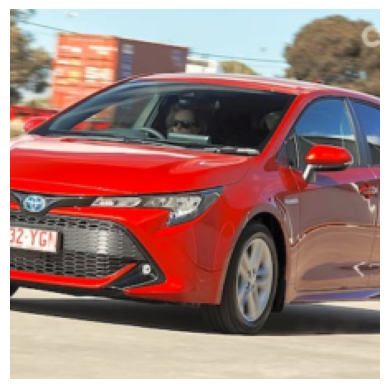

Rank 1:
  Class Index: 817
  Class Label: sports_car
  Confidence: 8.6956
Rank 2:
  Class Index: 436
  Class Label: beach_wagon
  Confidence: 7.2478
Rank 3:
  Class Index: 479
  Class Label: car_wheel
  Confidence: 6.6278
Rank 4:
  Class Index: 581
  Class Label: grille
  Confidence: 6.2474
Rank 5:
  Class Index: 656
  Class Label: minivan
  Confidence: 5.3440


In [15]:
inference_pic(image1, model='resnet50d')

Example2:

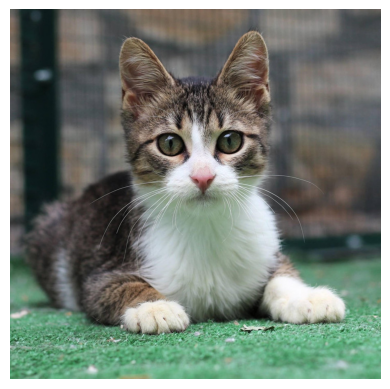

image size(w, h): (720, 719)


In [16]:
url2 = "https://media.4-paws.org/d/2/5/f/d25ff020556e4b5eae747c55576f3b50886c0b90/cut%20cat%20serhio%2002-1813x1811-720x719.jpg"
image2 = get_pic(url2)

torch.Size([3, 224, 224])


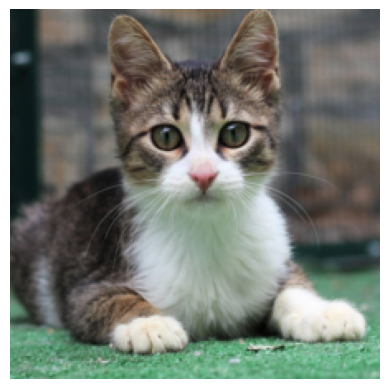

Rank 1:
  Class Index: 281
  Class Label: tabby
  Confidence: 9.3804
Rank 2:
  Class Index: 282
  Class Label: tiger_cat
  Confidence: 7.0128
Rank 3:
  Class Index: 285
  Class Label: Egyptian_cat
  Confidence: 6.4241
Rank 4:
  Class Index: 287
  Class Label: lynx
  Confidence: 3.6587
Rank 5:
  Class Index: 283
  Class Label: Persian_cat
  Confidence: 3.2298


In [17]:
inference_pic(image2, model='resnet50d')

Example3:

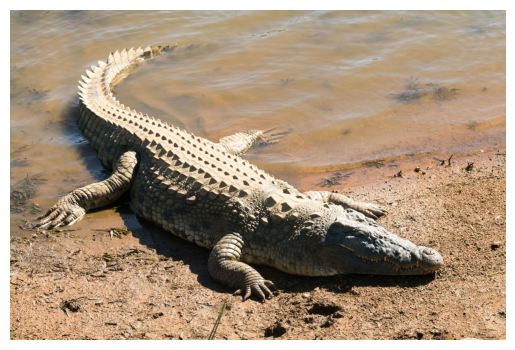

image size(w, h): (1600, 1065)


In [18]:
url3 = "https://cdn.britannica.com/84/198884-050-A37B8971/crocodile-Nile-swath-one-sub-Saharan-Africa-Madagascar.jpg"
image3 = get_pic(url3)

torch.Size([3, 224, 224])


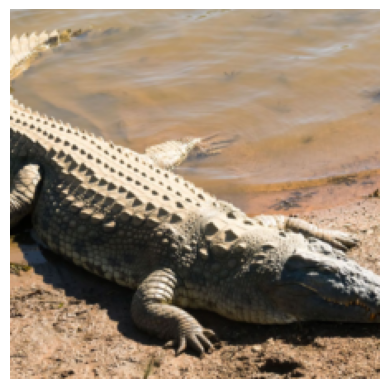

Rank 1:
  Class Index: 49
  Class Label: African_crocodile
  Confidence: 8.9561
Rank 2:
  Class Index: 50
  Class Label: American_alligator
  Confidence: 6.2079
Rank 3:
  Class Index: 44
  Class Label: alligator_lizard
  Confidence: 3.1659
Rank 4:
  Class Index: 41
  Class Label: whiptail
  Confidence: 2.3156
Rank 5:
  Class Index: 403
  Class Label: aircraft_carrier
  Confidence: 2.0193


In [19]:
inference_pic(image3, model='resnet50d')

Example4:

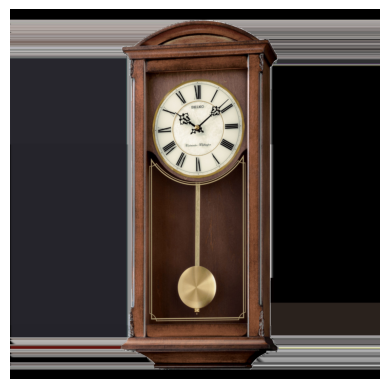

image size(w, h): (1280, 1280)


In [20]:
url4 = "https://cdn11.bigcommerce.com/s-qh06nmrb4v/images/stencil/1280x1280/products/258/2922/QXH030BLH-NB__21558.1724708585.png?c=2"
image4 = get_pic(url4)

torch.Size([3, 224, 224])


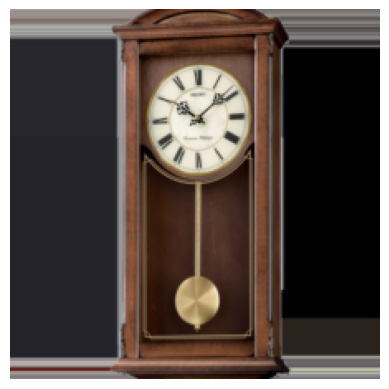

Rank 1:
  Class Index: 892
  Class Label: wall_clock
  Confidence: 9.2920
Rank 2:
  Class Index: 409
  Class Label: analog_clock
  Confidence: 7.4545
Rank 3:
  Class Index: 426
  Class Label: barometer
  Confidence: 4.3324
Rank 4:
  Class Index: 442
  Class Label: bell_cote
  Confidence: 3.7764
Rank 5:
  Class Index: 604
  Class Label: hourglass
  Confidence: 2.5872


In [21]:
inference_pic(image4, model='resnet50d')